In [1]:
%load_ext autoreload
%autoreload 2.0
%matplotlib inline

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import glob
# import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
# import tensorflow as tf
import sys
sys.path.insert(0, '../.')
from data.segmentation_dataset_loader import *
from data.detection_dataset_loader import *
from model import *
# from Trainer import *
from evaluation.evaluate import *
from data.postprocessing.nms import *
from scipy.spatial.transform import Rotation as R

/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
training=True
base_path = '/Users/apple/Desktop/Master/Data/'
list_files = list(map(lambda x: x.split('.')[0], os.listdir(base_path+'/data_object_image_3/training/image_3')))
random.seed(0)
random.shuffle(list_files)

camera_paths = list(map(lambda x: base_path+'/data_object_image_3/training/image_3/' + x + '.png', list_files))
lidar_paths = list(map(lambda x: base_path+'/data_object_velodyne/training/velodyne/' + x + '.bin', list_files))
label_paths = list(map(lambda x: base_path + '/data_object_label_2/training/label_2/' + x + '.txt', list_files))
calib_paths = list(map(lambda x: base_path + '/data_object_calib/training/calib/' + x + '.txt', list_files))
        
ln = int(len(list_files) * 0.5)
final_sample = len(list_files)

# ln = int(10 * 0.5)
# final_sample = 10
        
if training:
            list_files = list_files[:ln]
            list_camera_paths = camera_paths[:ln]
            list_lidar_paths = lidar_paths[:ln]
            list_label_paths = label_paths[:ln]
            list_calib_paths = calib_paths[:ln]
else:
            list_camera_paths = camera_paths[ln:final_sample]
            list_lidar_paths = lidar_paths[ln:final_sample]
            list_label_paths = label_paths[ln:final_sample]
            list_calib_paths = calib_paths[ln:final_sample]
            list_files = list_files[ln:final_sample]


In [4]:
i_c = 3
current_file = list_files[i_c]
current_file

'000007'

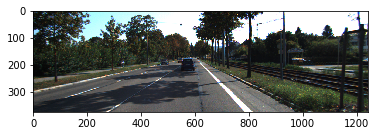

In [5]:
img = mpimg.imread(base_path + '/data_object_image_3/training/image_3/' +current_file+".png")
plt.imshow(img)

In [6]:
r = R.from_rotvec(np.radians(0) * np.array([0, 0, 1]))
rot = r.as_dcm()
rot = np.append(rot, np.array([[0,0,0]]), axis=0)
rot = np.append(rot, np.array([[0],[0],[0],[1]]), axis=1)

tr_x = 5
tr_y = 0
tr_z = 0
tr = np.array([[tr_x], [tr_y], [tr_z], [0]])

sc_x = 1
sc_y = 1
sc_z = 1
sc = np.array([[sc_x, 0, 0, 0], [0, sc_y, 0, 0], [0, 0, sc_z, 0], [0, 0, 0, 1]])

(370, 1224, 3)


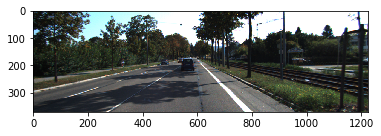

In [35]:
image = read_camera(base_path + '/data_object_image_3/training/image_3/'+ current_file + '.png', (1224, 370), fliplr=False)
print(image.shape)
plt.imshow(image)

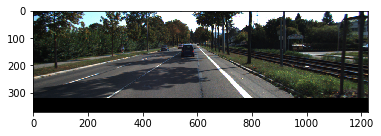

In [36]:
translate_y = -50
image_size = (370, 1224)
if translate_y > 0:
        image [abs(translate_y):image_size[0], :]= image[:image_size[0]-abs(translate_y), :]
        image[:abs(translate_y), :] = 0
elif translate_y < 0:
        image [:image_size[0]-abs(translate_y), :]= image[abs(translate_y):image_size[0], :]
        image[image_size[0]-abs(translate_y):, :] = 0
plt.imshow(image)

In [ ]:
translate_x = 50
image_size = (370, 1224)
image [:image_size[0]-abs(translate_x), :]= image[abs(translate_x):image_size[0], :]
image[image_size[0]-abs(translate_x):, :] = 0
plt.imshow(image)

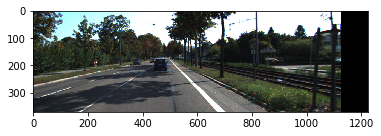

In [30]:
translate_x = 100
image_size = (370, 1224)
image [:, :image_size[1]-abs(translate_x)]= image[:, abs(translate_x):image_size[1]]
image[:, image_size[1]-abs(translate_x):] = 0
plt.imshow(image)

In [7]:

# current_file = list_files2[3]
    
translate_x = 0
translate_y = 0
translate_z = 0
ang = 0
fliplr = False

# i_c = 25
# current_file = list_files2[i_c]
# current_file

h, w, _ = cv2.imread(base_path + '/data_object_image_3/training/image_3/'+ current_file + '.png').shape
all_data, label, Tr_velo_to_cam, R0_rect, P3, directions = read_label(rot, tr, sc, base_path + '/data_object_label_2/training/label_2/'+ current_file + '.txt', 
                                                  base_path + '/data_object_calib/training/calib/'+ current_file + '.txt', 
                                                  0, 0, get_actual_dims=True,
                                                         ang=ang, translate_x=translate_x,
                                              translate_y=translate_y, translate_z=translate_z, fliplr=fliplr)

lidar_image = velo_points_bev(rot, tr, sc, base_path + '/data_object_velodyne/training/velodyne/'+ current_file + '.bin',
                              base_path + '/data_object_calib/training/calib/'+ current_file + '.txt',
                           size=(512, 448, 40), img_height=375, img_width=1242, ang=ang, translate_x=translate_x,
                              translate_y=translate_y, translate_z=translate_z, fliplr=fliplr)

# label = get_target(label, directions,  anchors=np.array([3.9, 1.6, 1.5]))

(3, 3)
(3, 3)
(18398, 4)
(18398, 4)


(512, 448)
293.93228483787345 220.53869700630193 23.027972156620866 9.275906596834908 -88.80849
131.7137260315767 182.85417136928538 26.6257491190859 8.437902895147813 -88.80849
38.37954211689777 198.05234536958528 29.14627657726836 9.275115128514972 -89.381448



<Figure size 432x288 with 0 Axes>

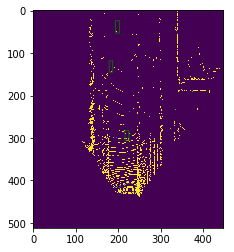

In [83]:

#groundtruth
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image[:, :, 15:], 2), 0, 1)
# img = np.fliplr(img)
ax.imshow(img)

print(img.shape)
for i in range(0, len(label)):
    w = label[i][3] 
    h = label[i][4] 
    x = label[i][0]
    y = label[i][1]
#     x = img.shape[0] - label[i][0]
#     y = img.shape[1] - label[i][1]
    c = 'g'
    if directions[i] >= 1.:
        c = 'b'
#     plt.scatter(y, x, s=10, c=c)
    polygon = convert5Pointto8Point(y, x, w, h, -label[i][6]*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for j in range(4):
        l.append([xs[j], ys[j]])
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    print(x, y, w, h, -label[i][6]*57.2958)

print()


plt.show()


(512, 448)
329.91820033083116 220.53869700630193 23.027972156620923 9.27590659683491 -88.80849
167.69964152453446 182.85417136928538 26.625749119085842 8.437902895147813 -88.80849
74.36545760985553 198.05234536958528 29.146276577268303 9.27511512851497 -89.381448



<Figure size 432x288 with 0 Axes>

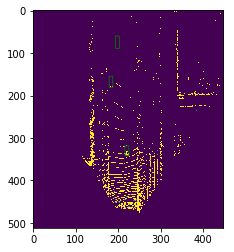

In [39]:

#groundtruth
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image[:, :, 15:], 2), 0, 1)
# img = np.fliplr(img)
ax.imshow(img)

print(img.shape)
for i in range(0, len(label)):
    w = label[i][3] 
    h = label[i][4] 
    x = label[i][0]
    y = label[i][1]
#     x = img.shape[0] - label[i][0]
#     y = img.shape[1] - label[i][1]
    c = 'g'
    if directions[i] >= 1.:
        c = 'b'
#     plt.scatter(y, x, s=10, c=c)
    polygon = convert5Pointto8Point(y, x, w, h, -label[i][6]*57.2958)
    xs = polygon[0::2]
    ys = polygon[1::2]
    l = []
    for j in range(4):
        l.append([xs[j], ys[j]])
    rect = patches.Polygon(l,linewidth=0.75,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    print(x, y, w, h, -label[i][6]*57.2958)

print()


plt.show()


In [101]:
((random.random() * 2) - 1.) / 10.

-0.013165632909243264